In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## 매출 관련 데이터 확인
- 아이템별 판매 지표 확인
- 시간별, 지역별 판매 지표 확인

In [2]:
retail = pd.read_csv('cleansingRetail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


### 날짜 데이터 타입 변경

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo      397884 non-null int64
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


In [10]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [11]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
InvoiceNo      397884 non-null int64
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null int64
Country        397884 non-null object
TotalPrice     397884 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.3+ MB


### 특정 기간동안의 매출
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

- 전체 매출

In [14]:
total_price = retail['TotalPrice'].sum()
total_price

8911407.904

- 국가별 매출

[Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Saudi Arabia')]

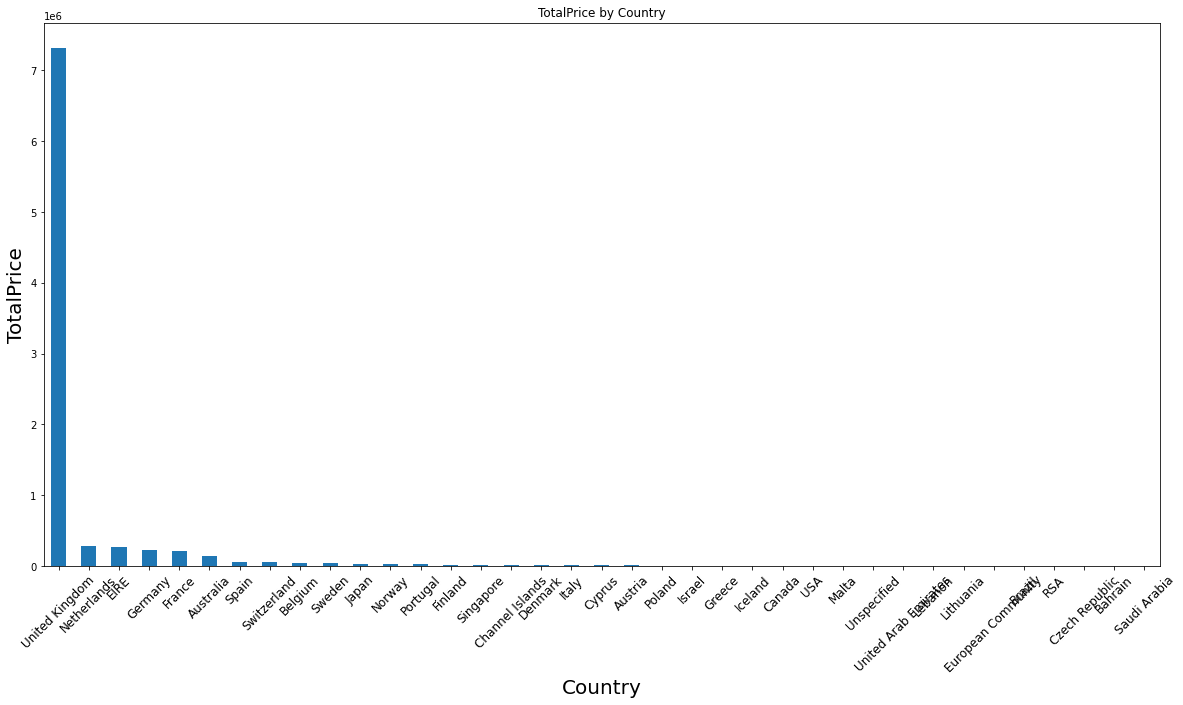

In [39]:
contry_price = retail.groupby('Country').sum()['TotalPrice'].sort_values(ascending=False)
plot = contry_price.plot.bar(figsize=(20,10))
plot.set_title('TotalPrice by Country')
plot.set_xlabel('Country',fontsize=20)
plot.set_ylabel('TotalPrice',fontsize=20)
plot.set_xticklabels(labels=contry_price.index,fontsize=12,rotation = 45)

- 그래프 함수

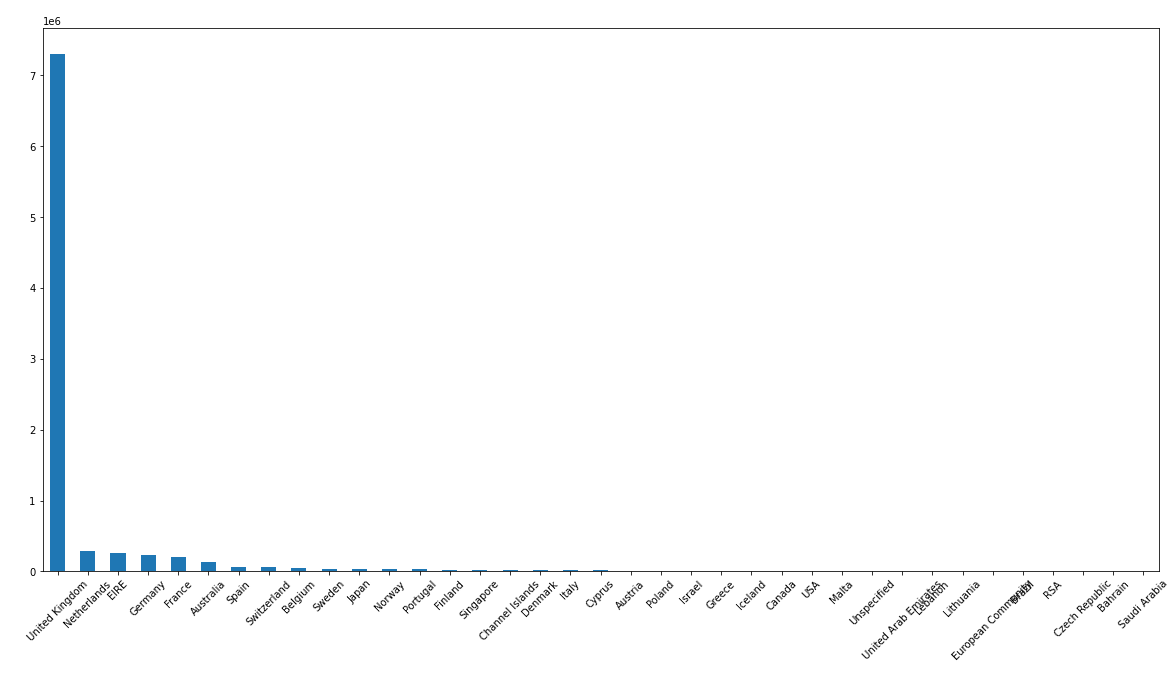

In [66]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), rotation=45):
    plot = df.plot(kind='bar', figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=18,color='white')
    plot.set_ylabel(ylabel, fontsize=18,color='white')
    plot.set_title(title, fontsize=20, color='white')
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    
plot_bar(contry_price, 'Country','TotalPrice', 'TotalPrice by Country')